In [1]:
# need to clean data first
import pandas as pd
import numpy as np
import datetime as dt
import geopandas
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("NYPD_Arrests_Data__Historic_.csv",low_memory = False)
df = df.dropna(subset=['PD_DESC','OFNS_DESC'])
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
#removed rows with latitude less than 41 because outside of new york city boroughs
df = df.loc[df['Latitude']<41]
#convert ARREST_DATE column to a datetime type
df_years={}
for i in range(2006,2021):
    df_years[i] = df[df['ARREST_DATE'].dt.year == i]

print("Complete")

Complete


In [ ]:
df_2007 = df_years[2007]
#for year in df_years:
    #print(df_years[year].head())
unique_ofns = df_2007['OFNS_DESC'].unique()

In [ ]:
#visualize where the concentration of certain crimes are in NYC
for ofns in unique_ofns:
    boros = geopandas.read_file(geopandas.datasets.get_path("nybb"))
    fig,ax = plt.subplots(figsize=(8,6),dpi=100)
    boros.to_crs("EPSG:4326").plot(color="lightgrey",ax=ax)
    df_ofns = df_2007[df_2007['OFNS_DESC']==ofns]
    x = df_ofns['Latitude'].tolist()
    y =  df_ofns['Longitude'].tolist()
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax.scatter(y, x, c=z, s=100)
    plt.title(ofns)
    #df_2007.plot(x="Longitude", y="Latitude", kind="scatter",colormap="YlOrRd",ax=ax)
    plt.show()

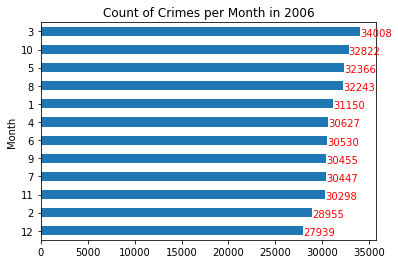

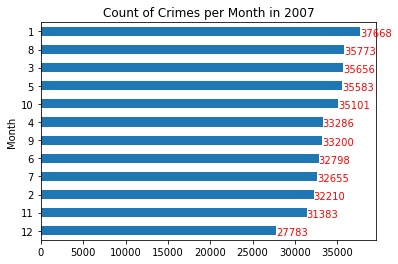

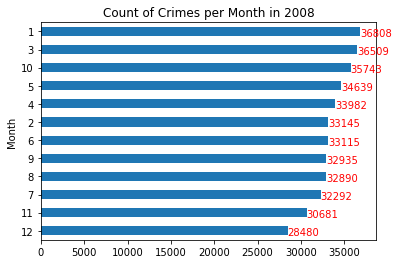

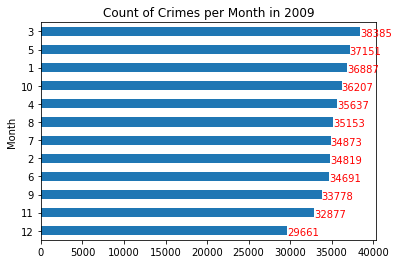

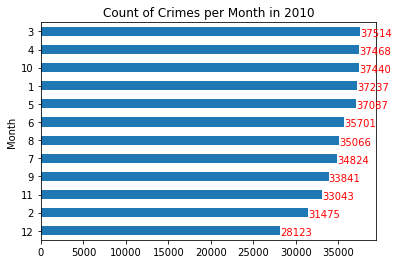

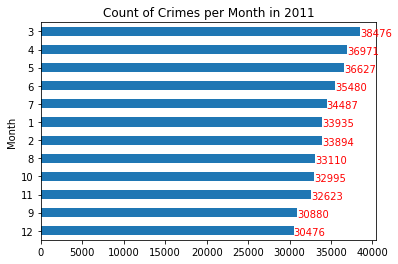

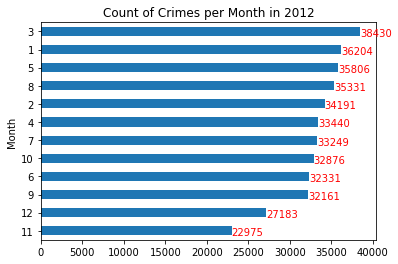

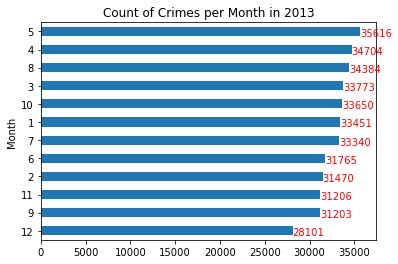

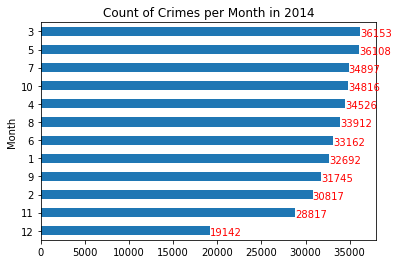

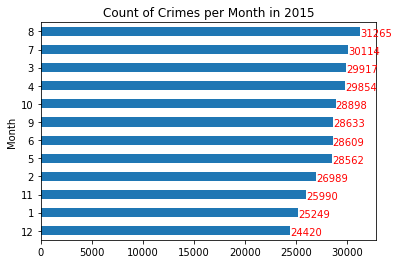

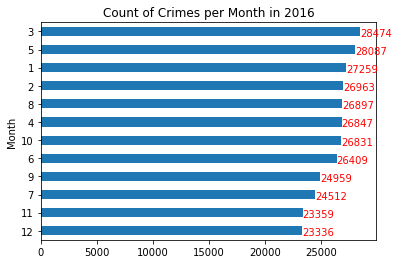

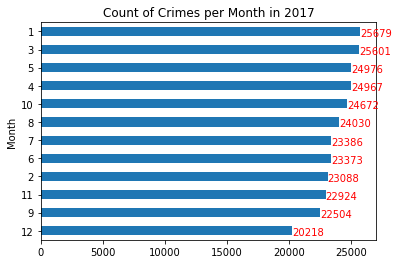

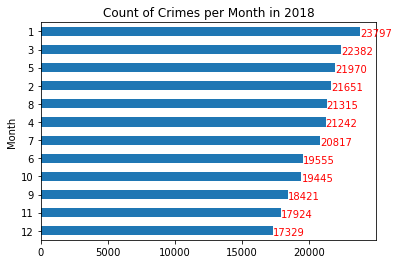

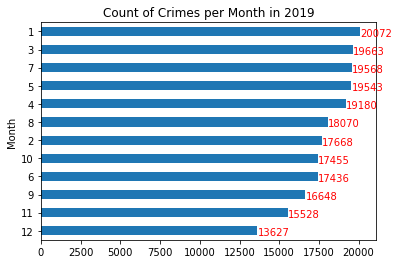

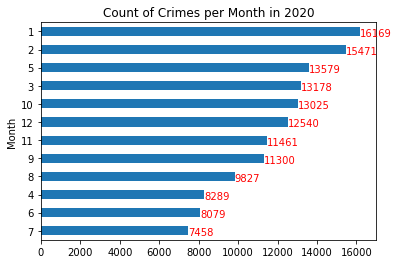

In [8]:
daily_crime = df.groupby('ARREST_DATE')["ARREST_DATE"].count()
#print(daily_crime)
crimes_per_year = df.groupby([df["ARREST_DATE"].dt.year])["ARREST_DATE"].count()
#print(crimes_per_year)
crimes_per_month = df.groupby([df["ARREST_DATE"].dt.year.rename("YEAR"), df["ARREST_DATE"].dt.month.rename("Month")])["ARREST_DATE"].count().sort_values()
for year in range(2006, 2021):
    model = crimes_per_month[year].plot(kind = "barh", title = f"Count of Crimes per Month in {str(year)}")
    for i, v in enumerate(crimes_per_month[year]):
        model.text(v, i - 0.25, str(v), color = "red")
    plt.show()

Text(0.5, 1.0, 'Total Number of Crimes per Year')

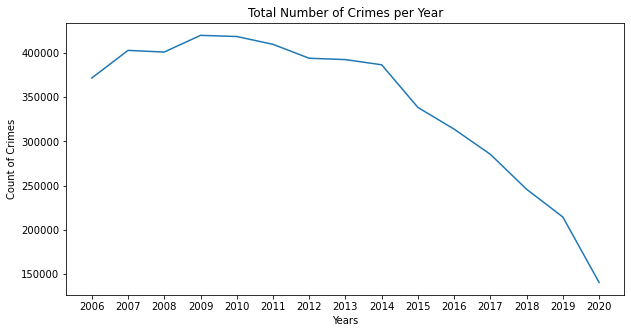

In [3]:
model = crimes_per_year.plot(kind = "line", xticks = crimes_per_year.index.values, figsize = (10, 5))
model.set_ylabel("Count of Crimes")
model.set_xlabel("Years")
model.set_title("Total Number of Crimes per Year")

In [4]:
unique_ofns = df.OFNS_DESC.unique()
unique_ofns.sort()

In [5]:
total_ofns = df.groupby("OFNS_DESC")["OFNS_DESC"].count()
percent_ofns = total_ofns / len(df) * 100
# ensures the sum of percentage of crime in category is 100%
assert int(percent_ofns.sum()) == 100
percent_ofns.sort_values(inplace = True)

Text(0.5, 0, 'Crime Percentage')

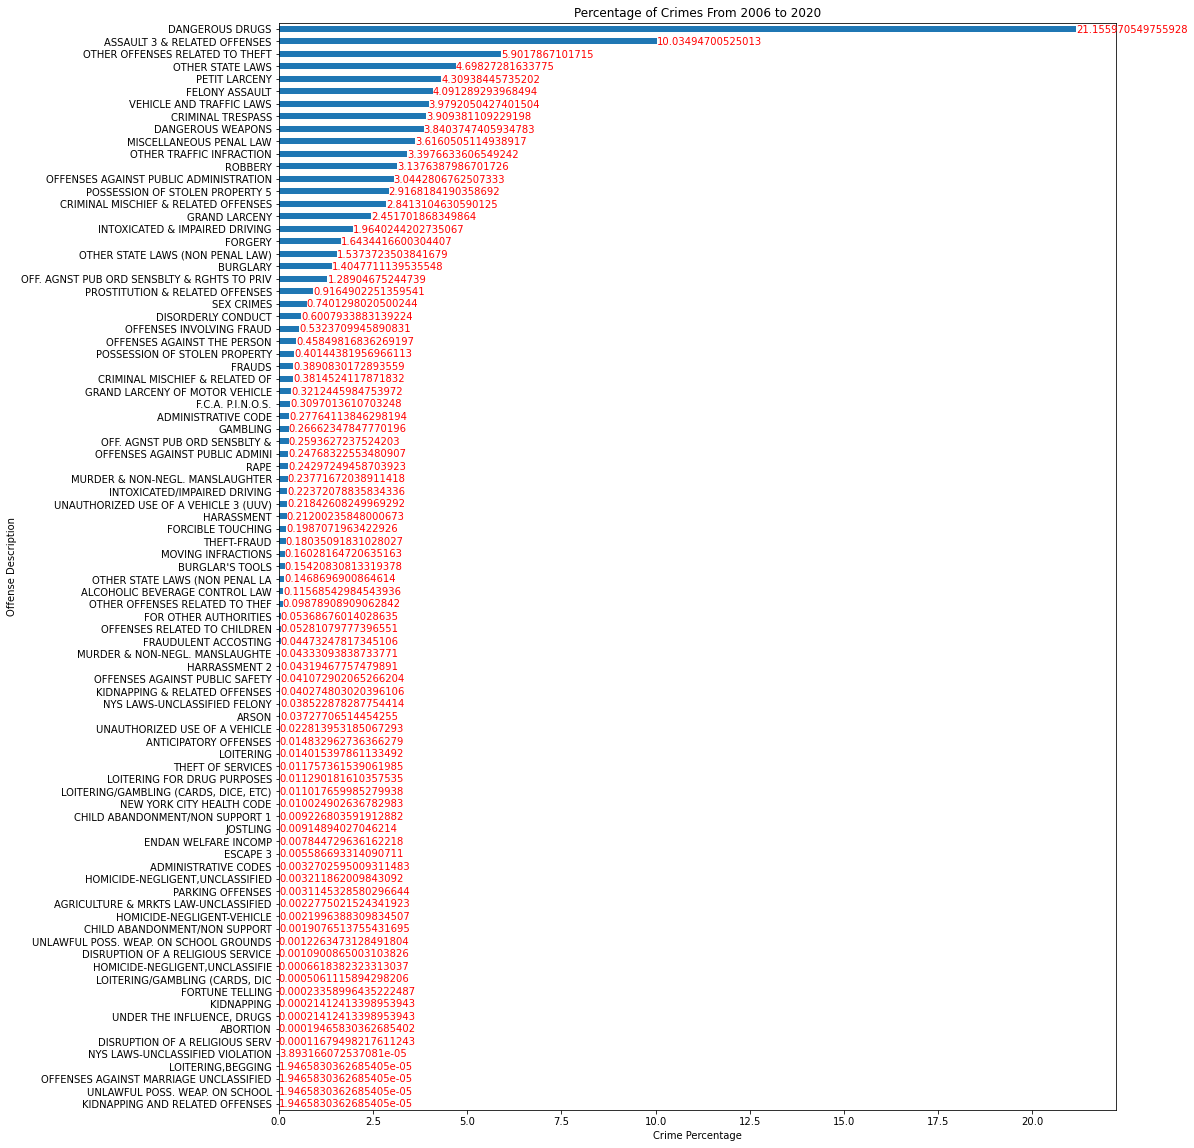

In [6]:
ofns_model = percent_ofns.plot(kind = "barh", figsize = (15, 20), title = "Percentage of Crimes From 2006 to 2020")
for i, v in enumerate(percent_ofns):
        ofns_model.text(v, i - 0.25, str(v), color = "red")
ofns_model.set_ylabel("Offense Description")
ofns_model.set_xlabel("Crime Percentage")

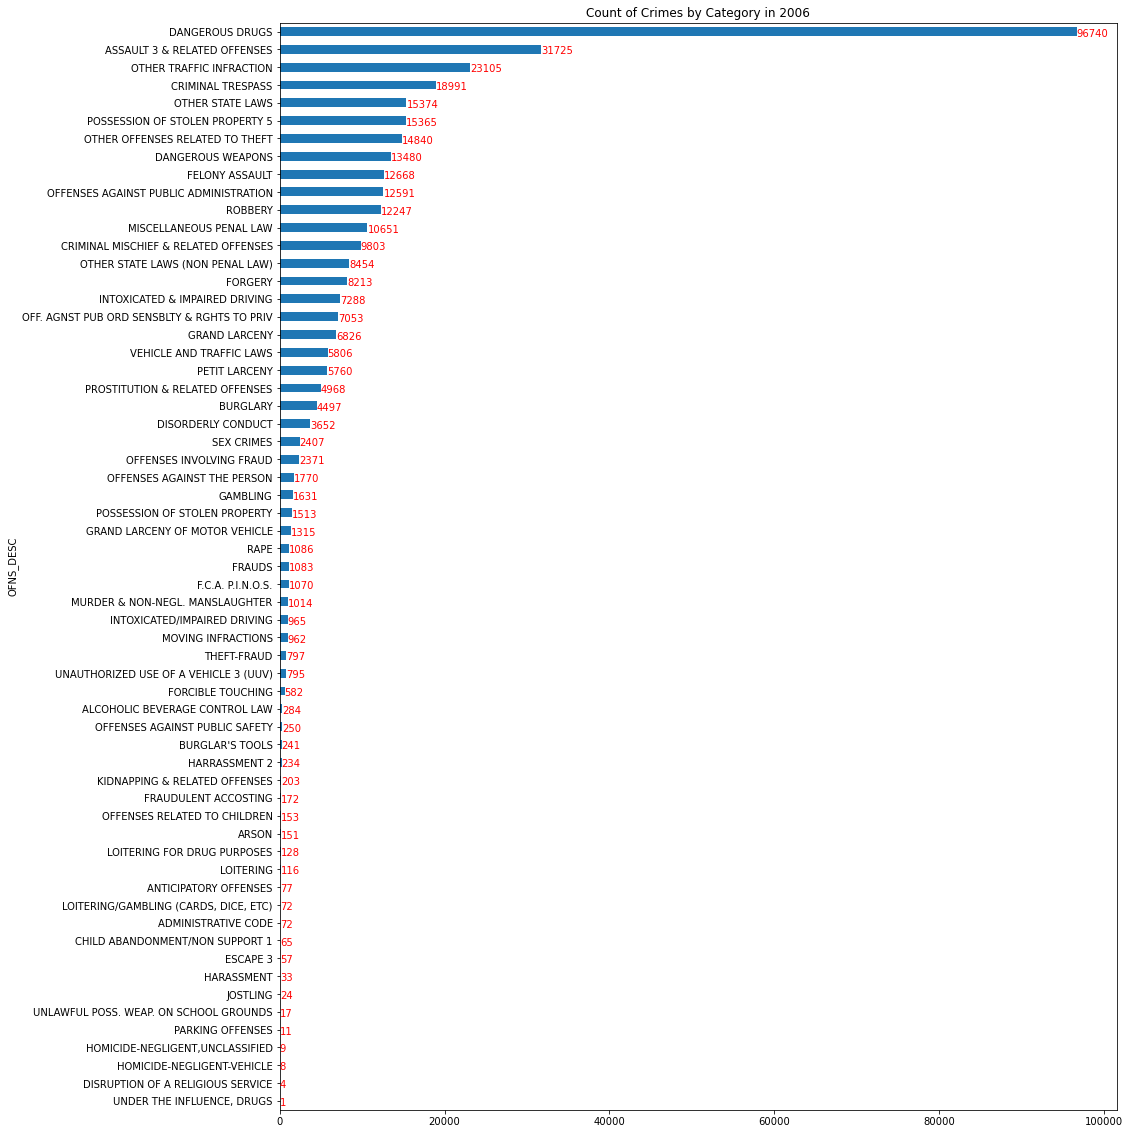

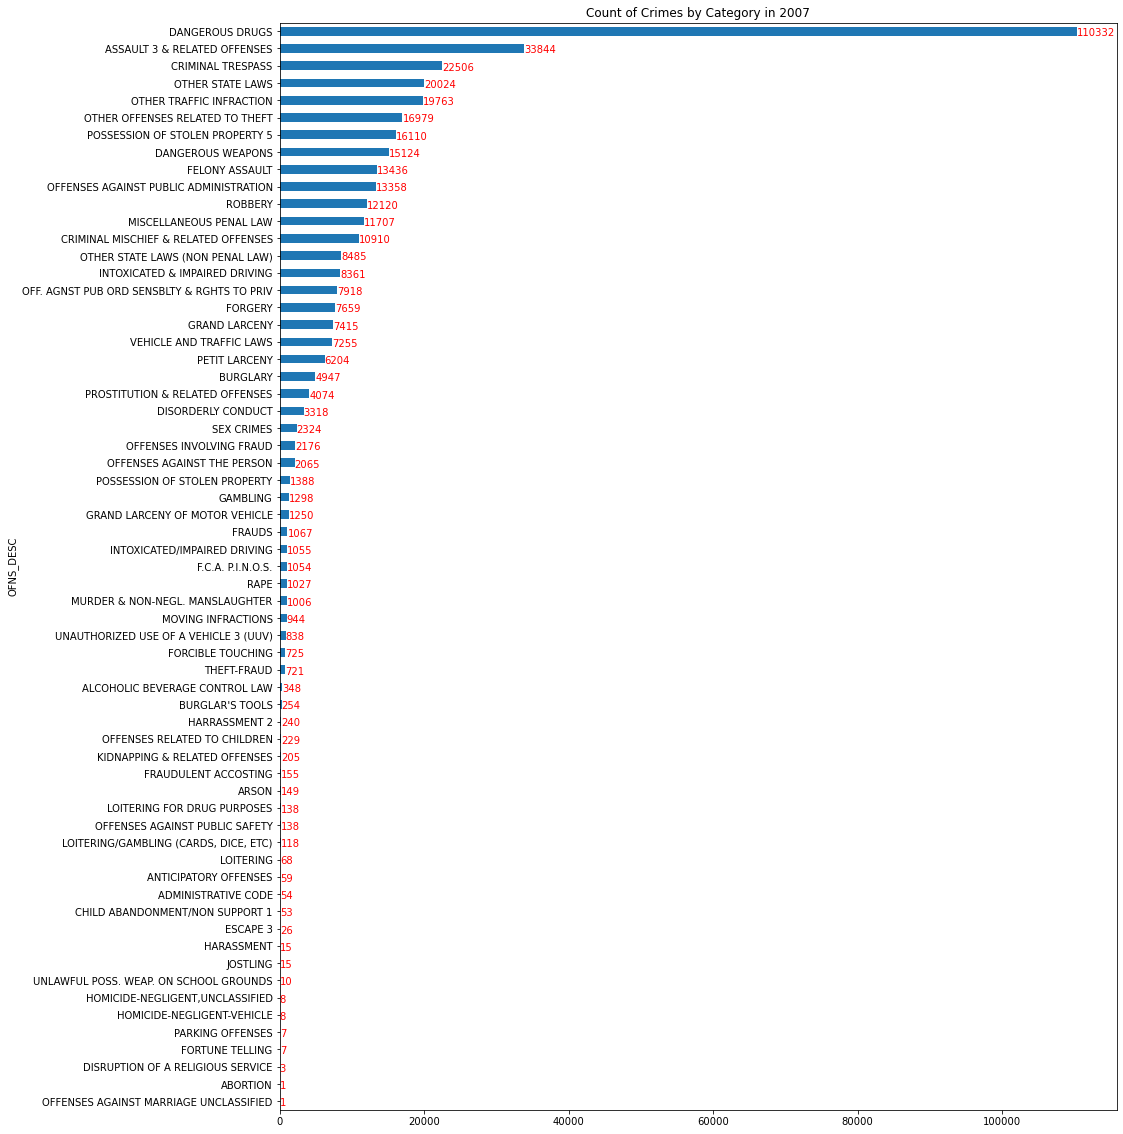

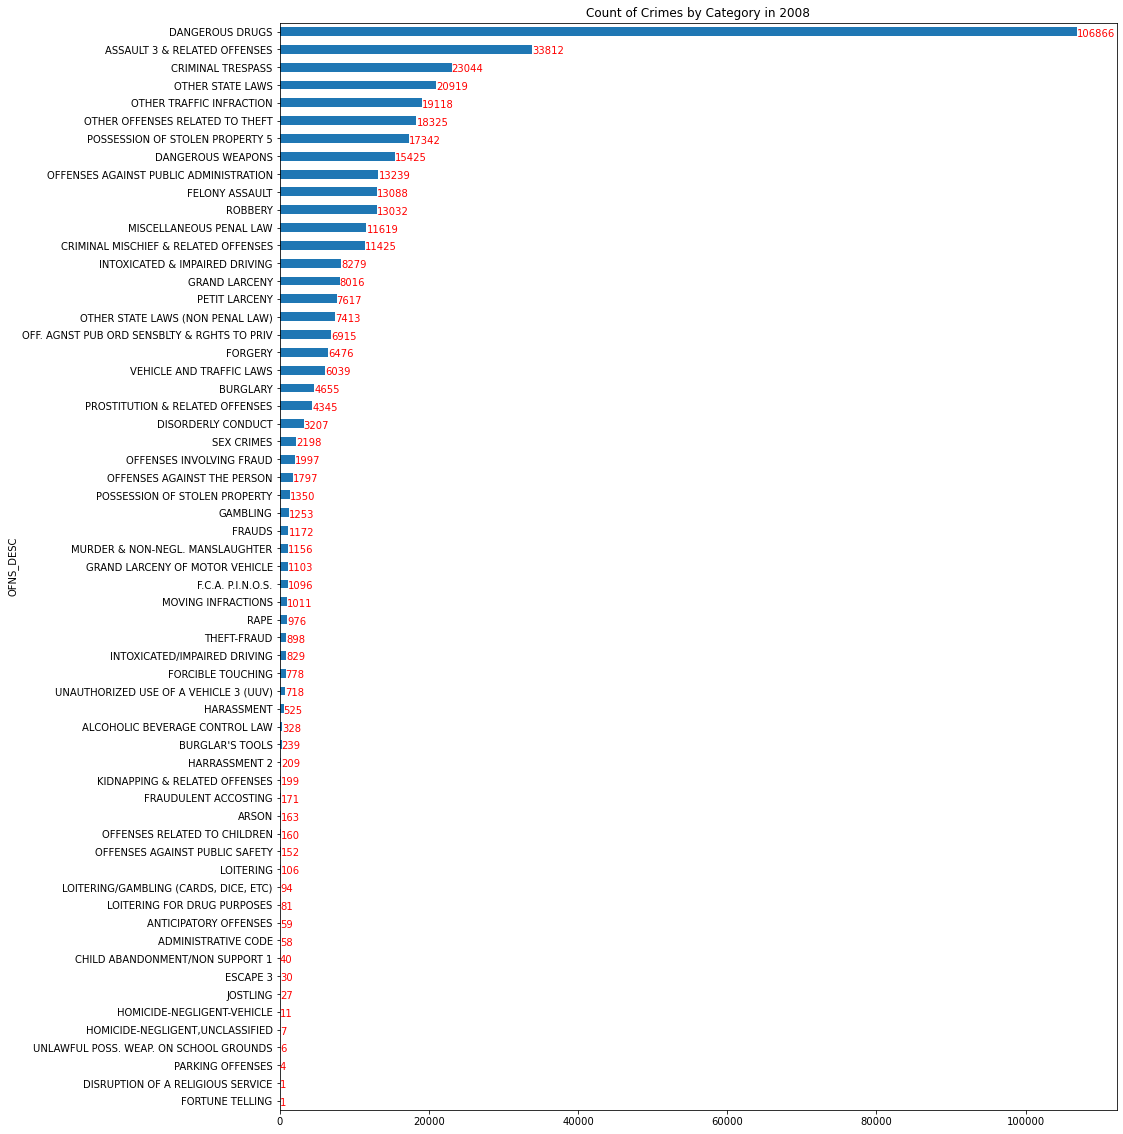

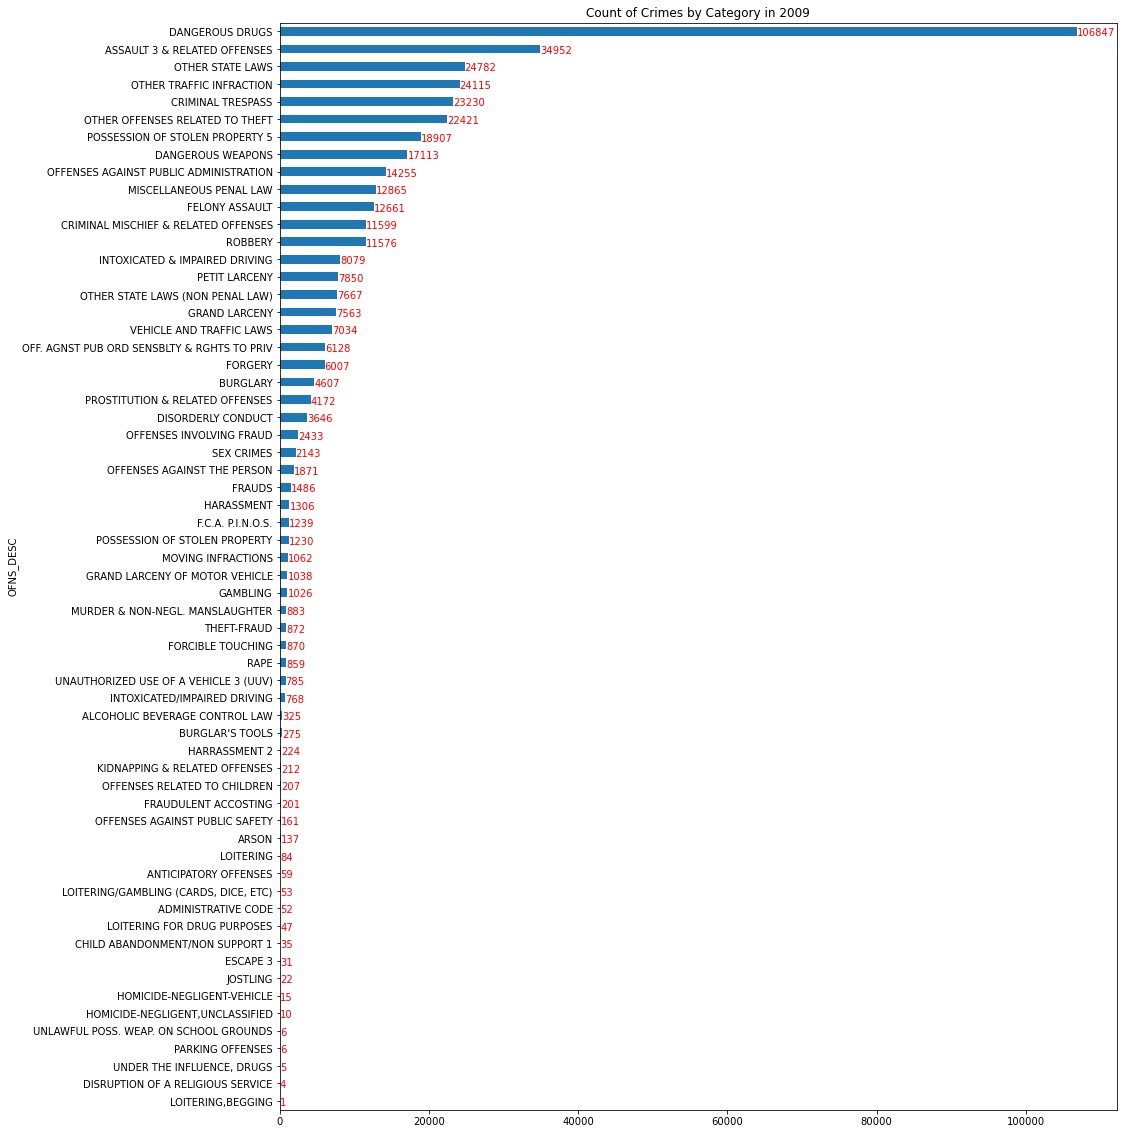

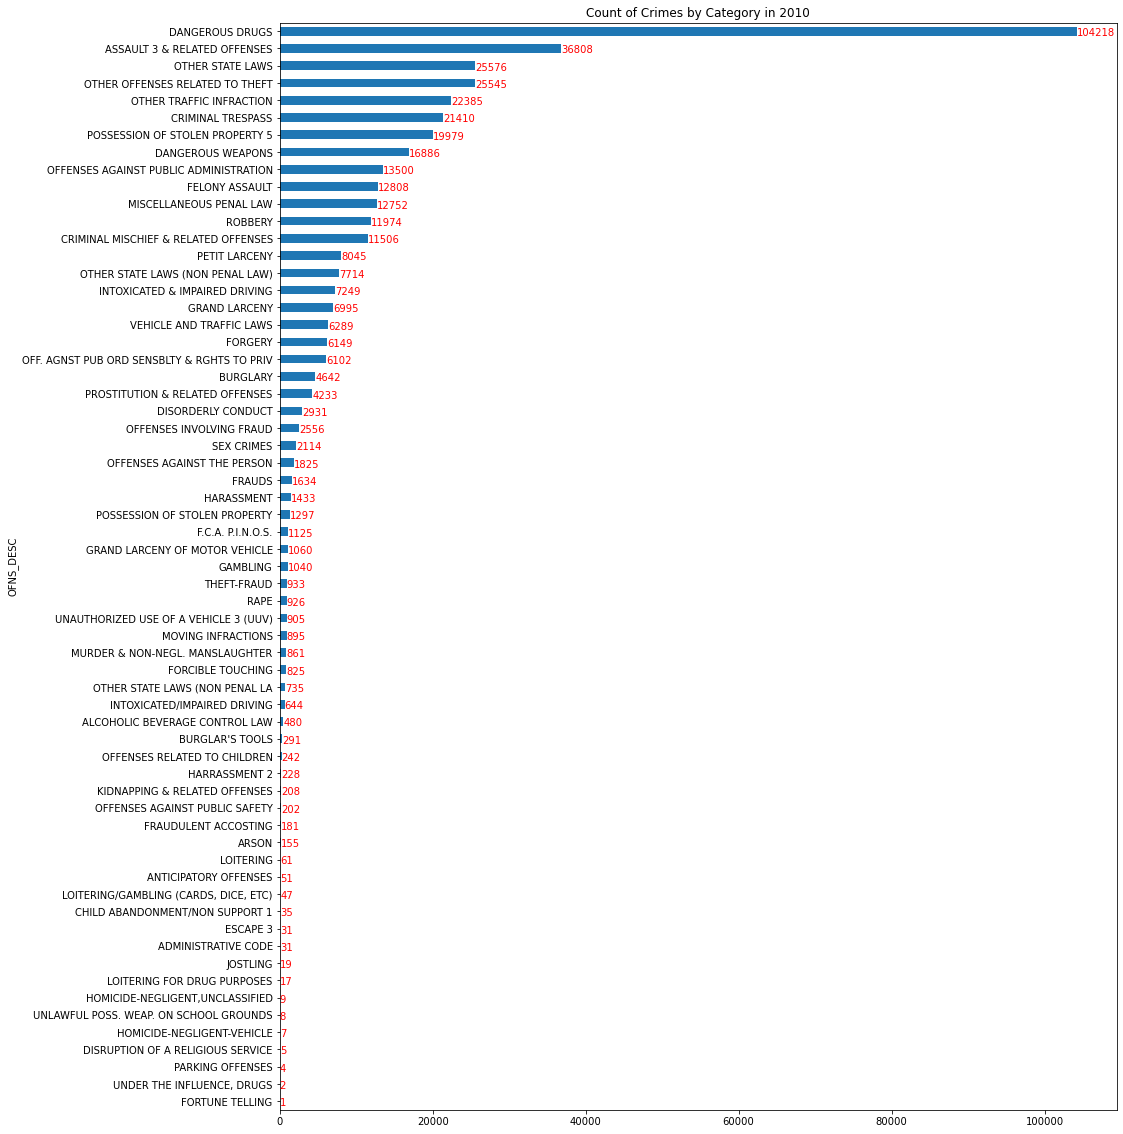

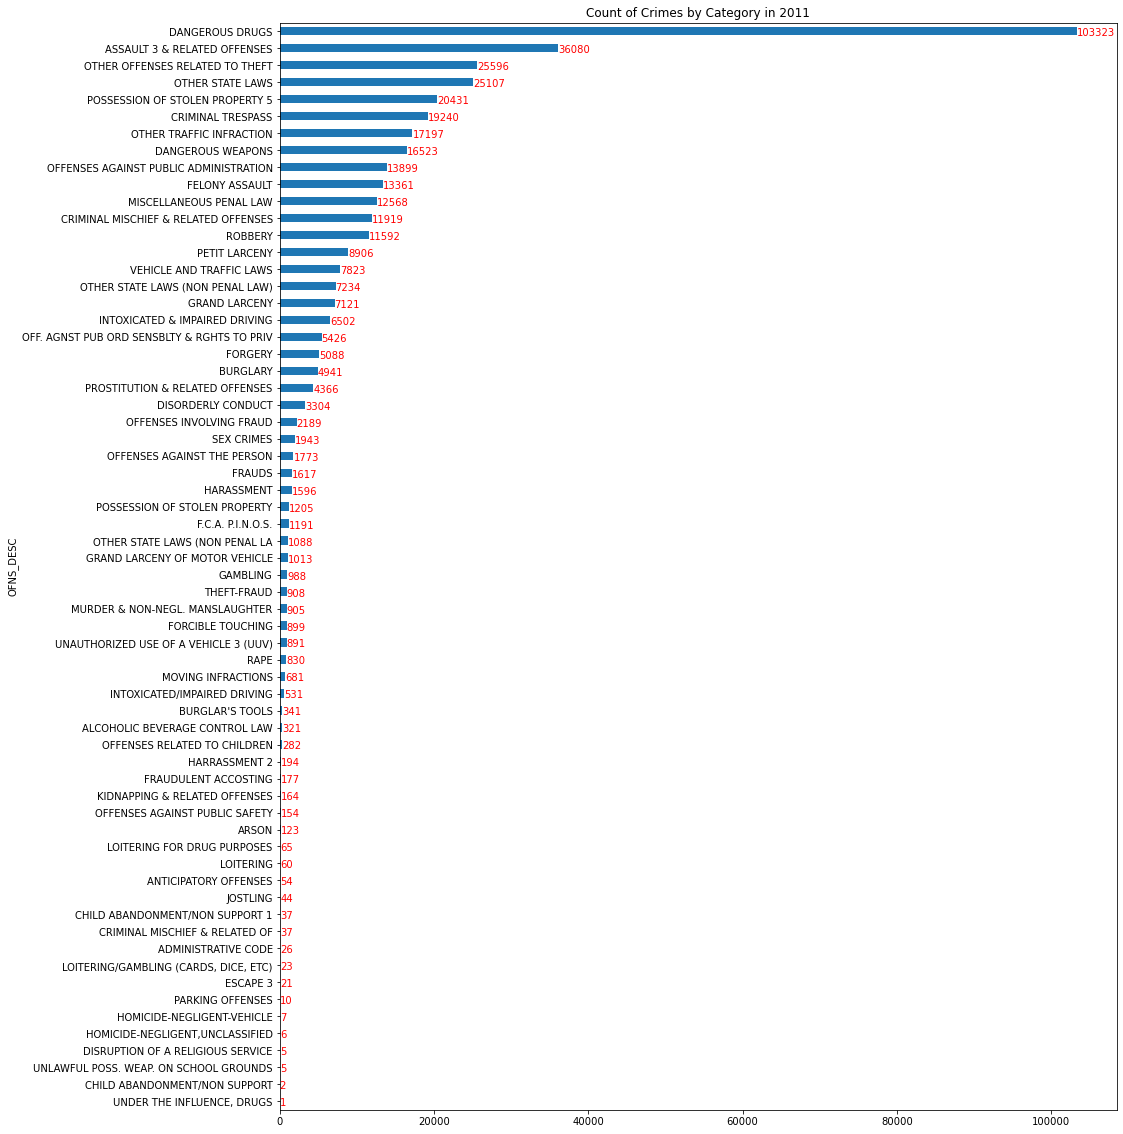

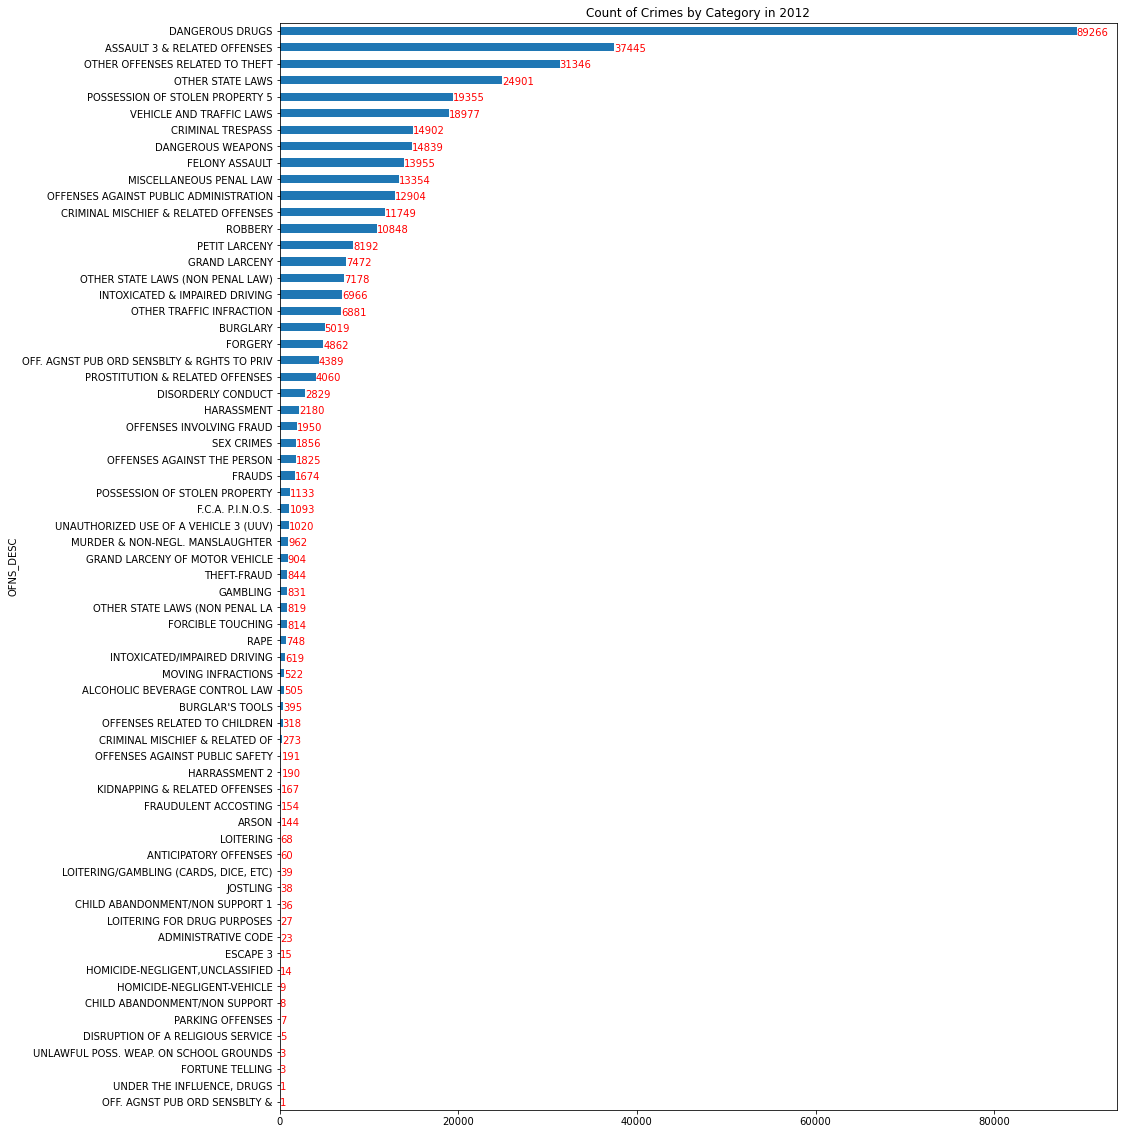

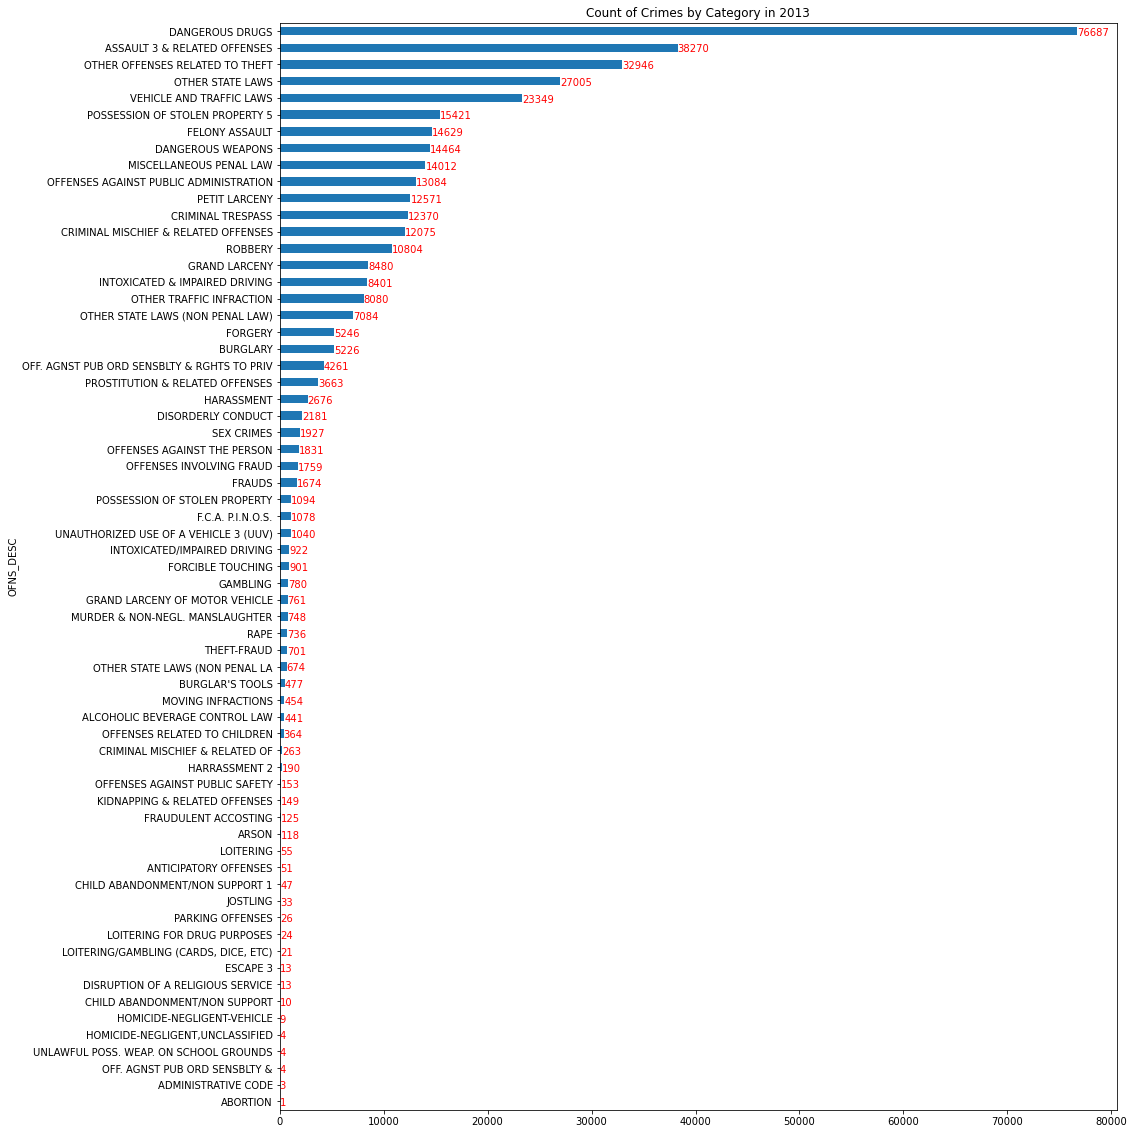

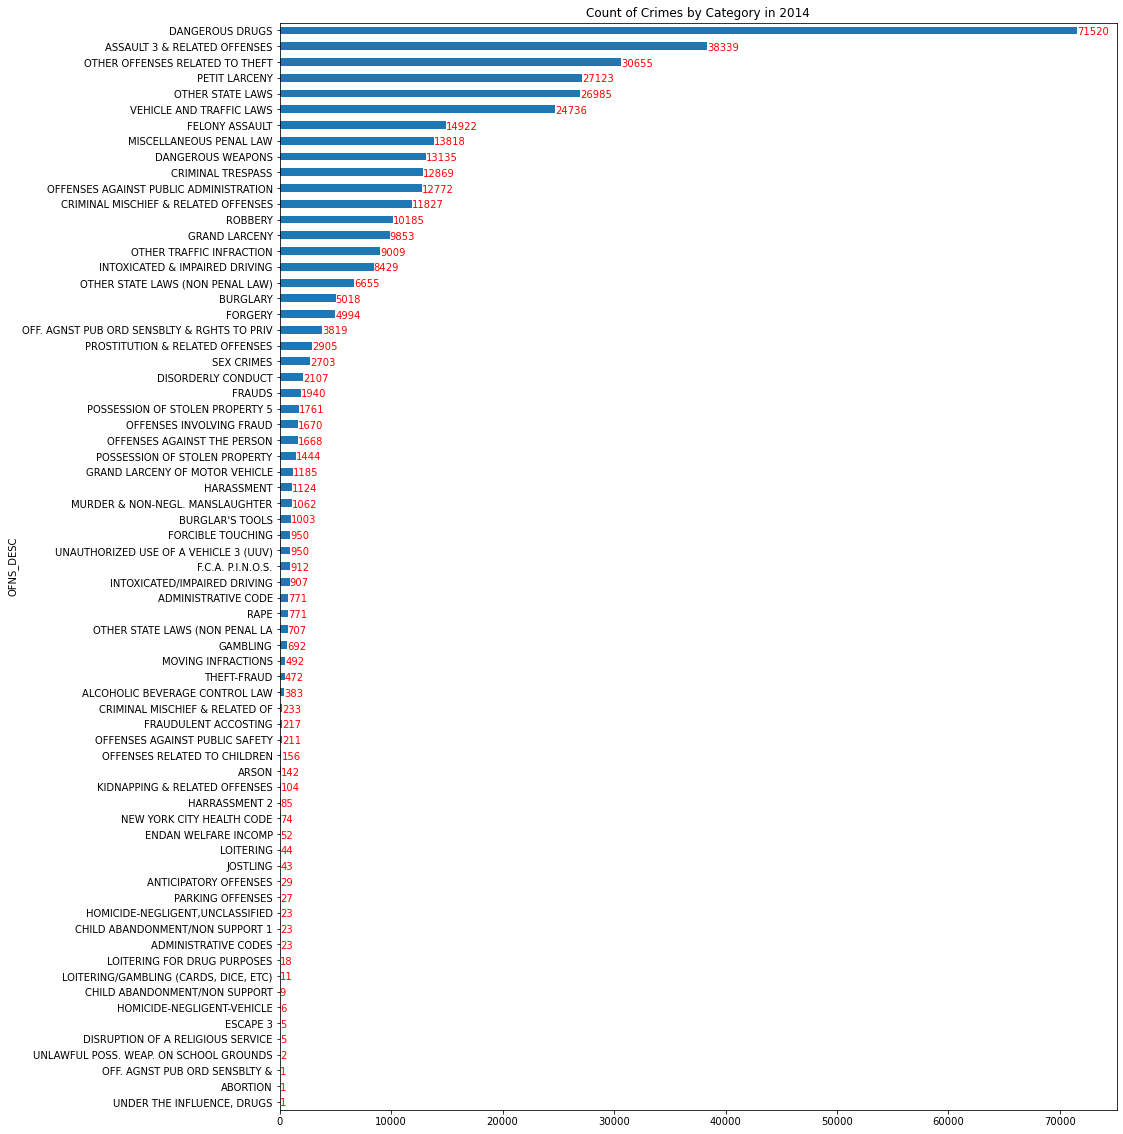

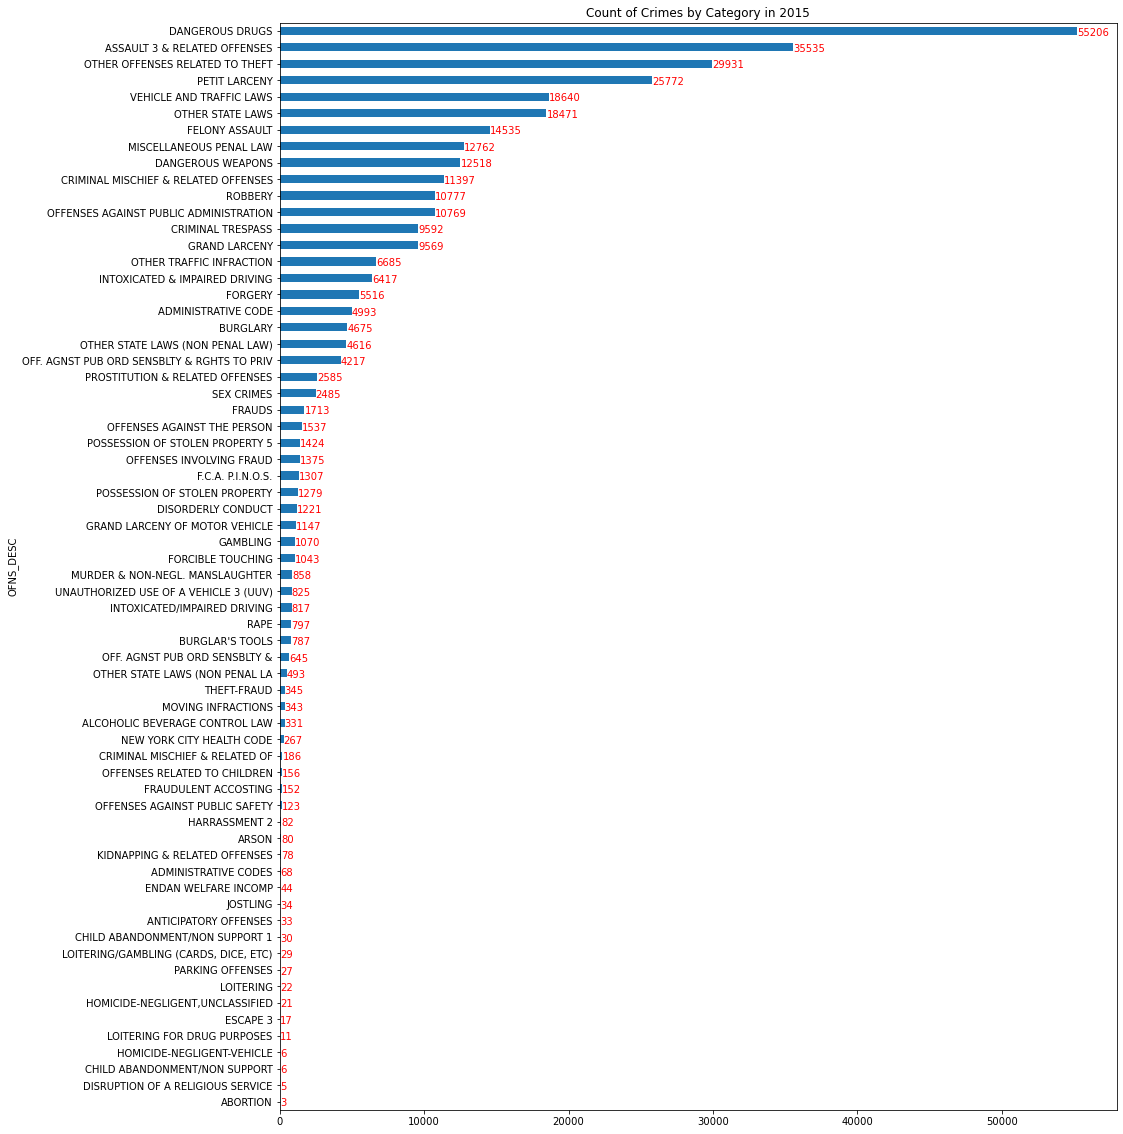

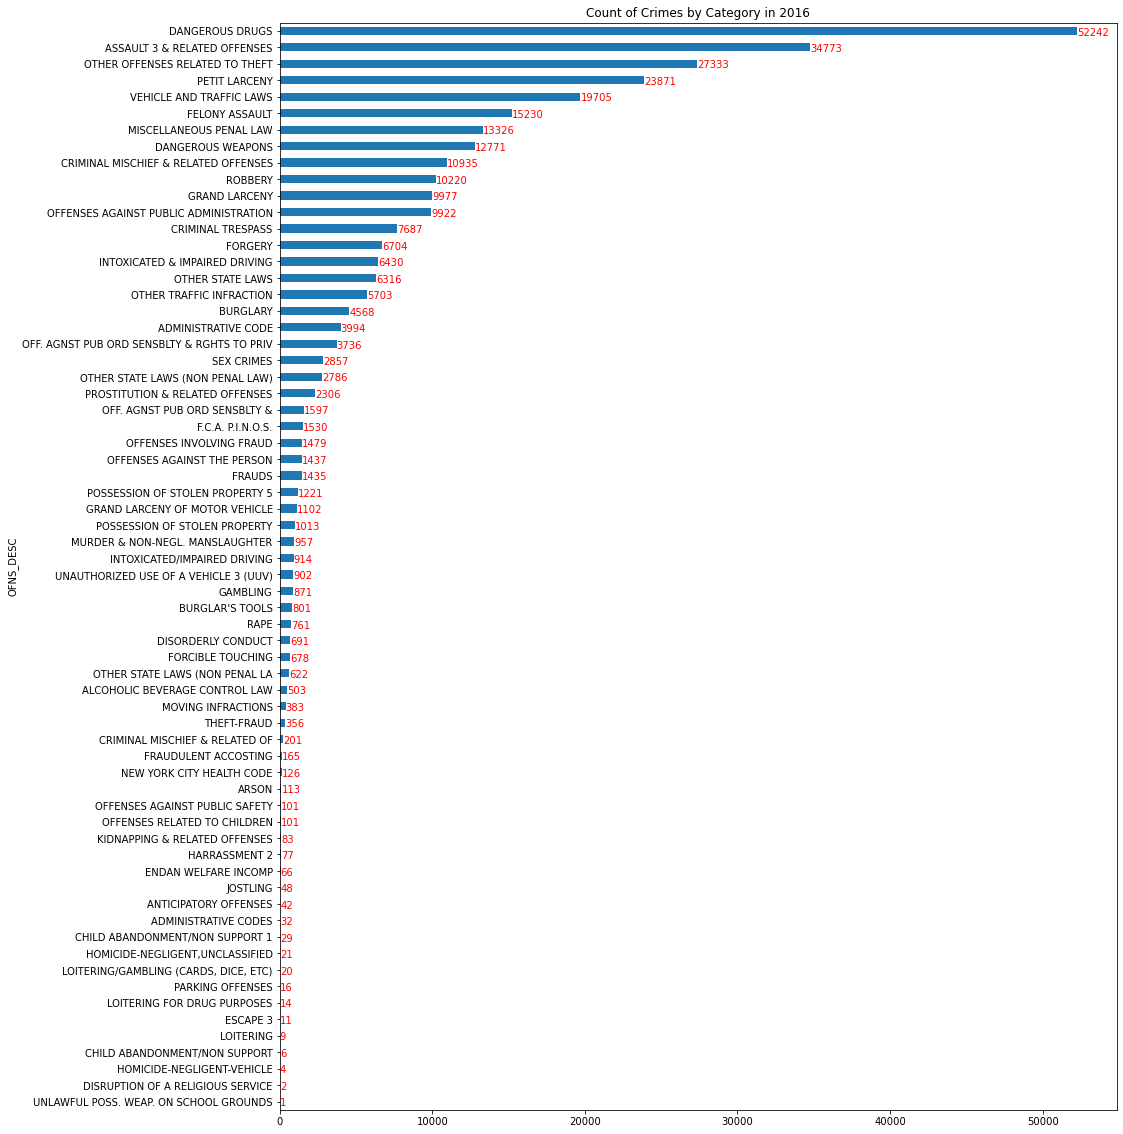

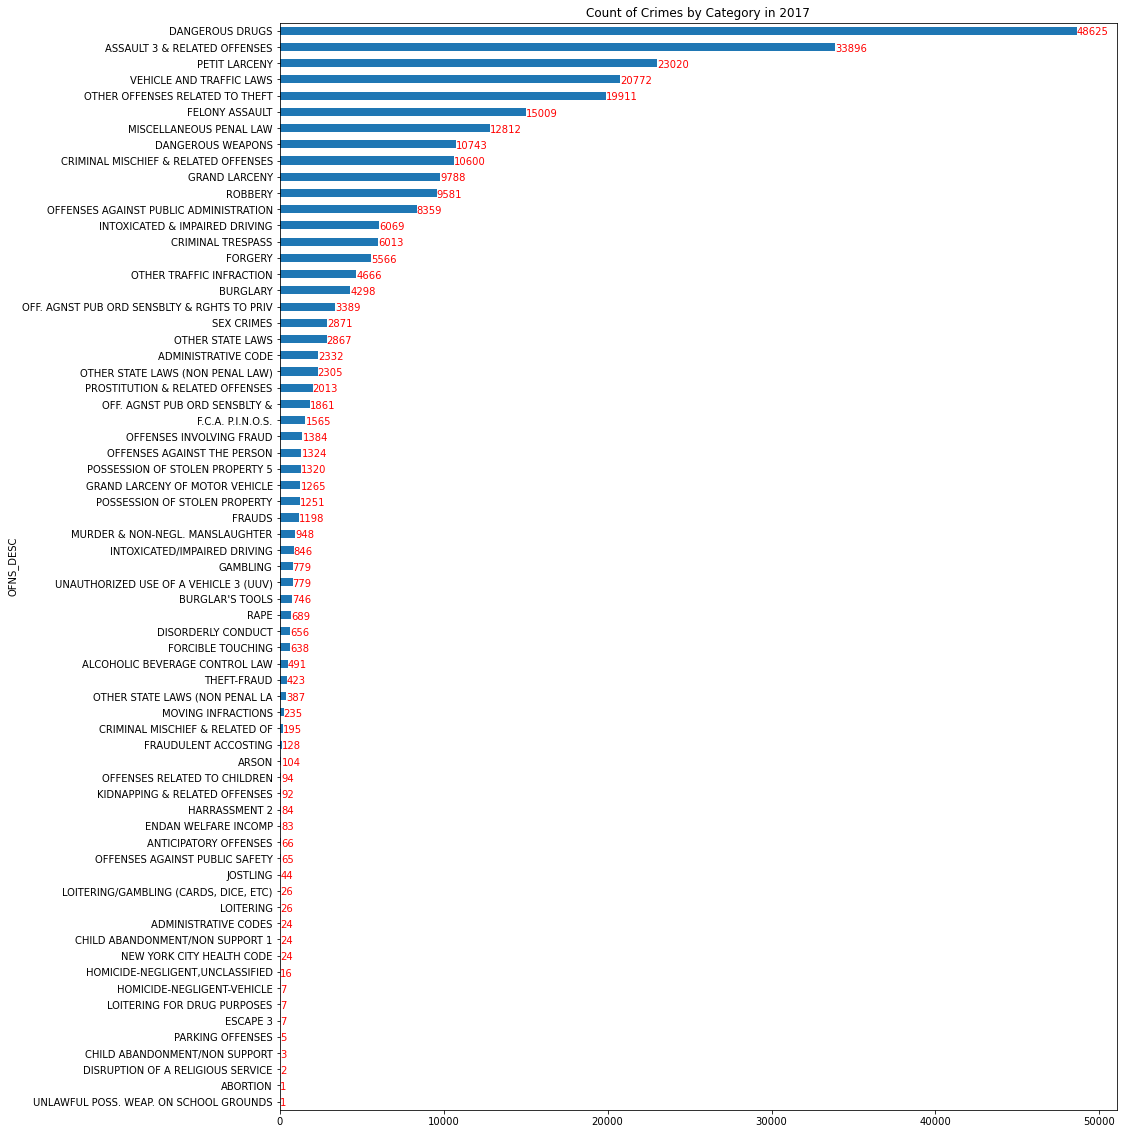

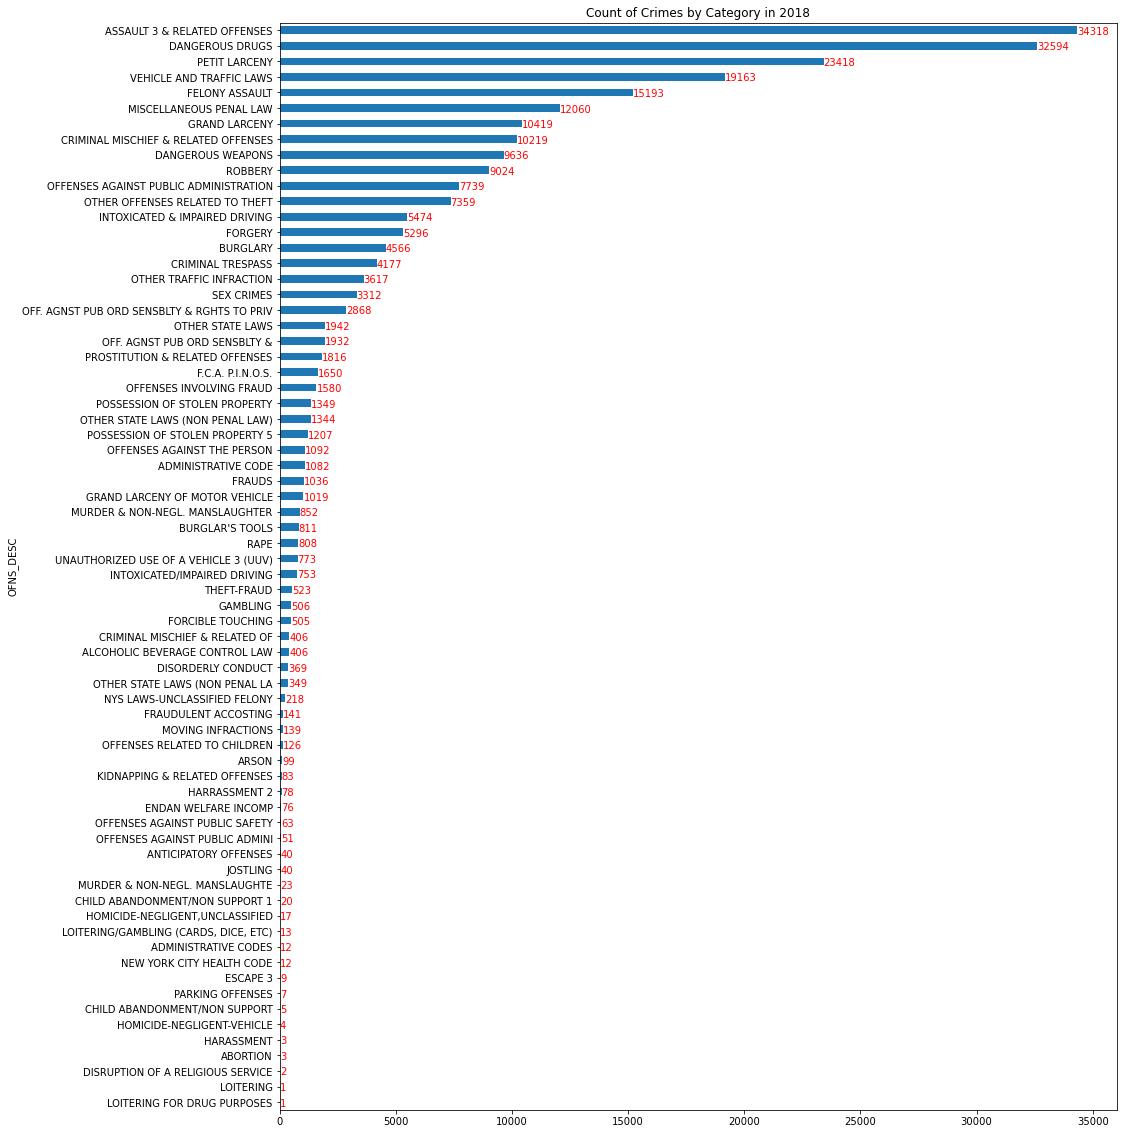

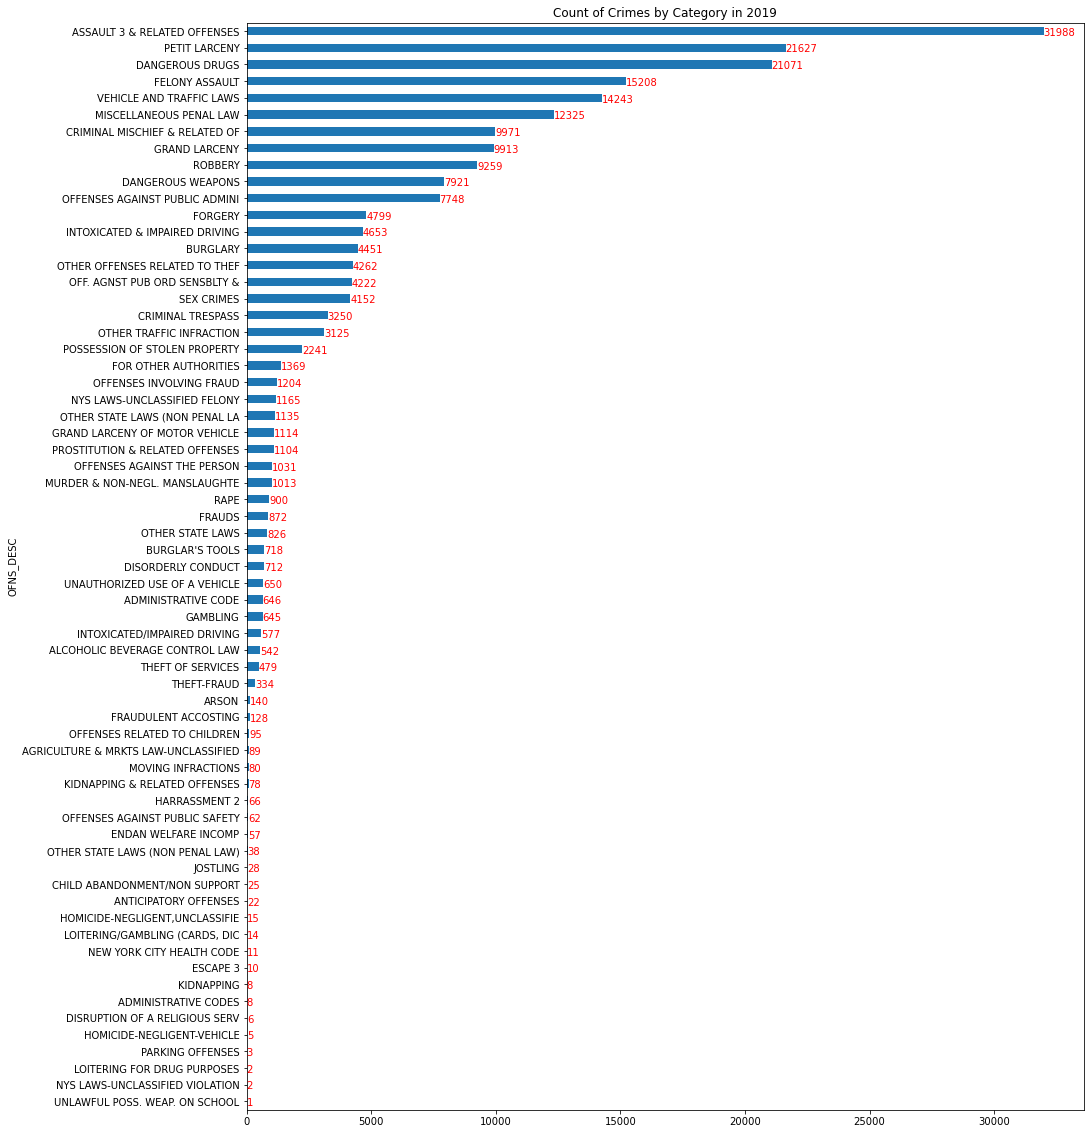

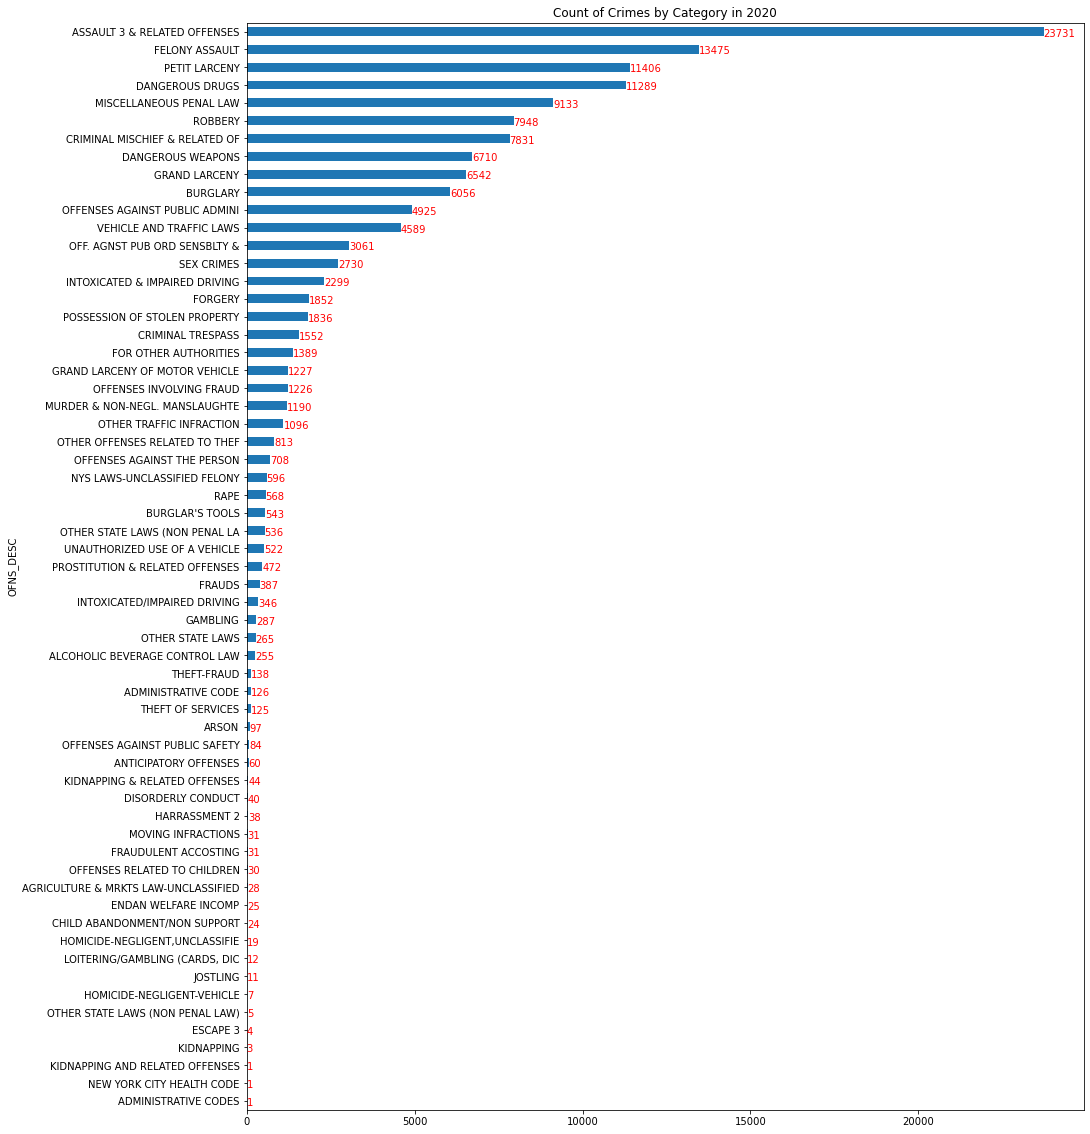

In [7]:
cat_per_year = df.groupby([df["ARREST_DATE"].dt.year, df["OFNS_DESC"]])["OFNS_DESC"].count().sort_values()
for year in range(2006, 2021):
    model = cat_per_year[year].plot(kind = "barh", title = f"Count of Crimes by Category in {str(year)}", figsize = (15, 20))
    for i, v in enumerate(cat_per_year[year]):
        model.text(v, i - 0.25, str(v), color = "red")
    plt.show()